Step 08: cross-correlation matrix and heatmaps of all channels of EEG features are plotted. The EEG features are without artifacts.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_columns = 34 # number of columns

file_path = './features_csv_feat11/'
data = pd.read_csv('EEG_features.csv')
file_name = data['fname']

In [3]:
# add all channels and subjects of EEG data 
data_concat = np.empty((0, 34))

for fname in file_name:
    df = pd.read_csv(file_path+fname)
    data_concat = np.concatenate((data_concat, df), axis=0)
    
print('Shape of concatenated data frame: {}' .format(data_concat.shape))

Shape of concatenated data frame: (142020, 34)


In [4]:
columns = pd.read_csv(file_path+fname).columns # extracting columns

df = pd.DataFrame(data = data_concat, columns=columns) # creating data frame of concatenated data

In [5]:
df_ex = df[df['flag'] == 0] # excluding flag == 1 values or artifacts
df_feat = df_ex.drop(['flag', 'alpha_mean', 'theta_mean', 'delta_mean'], axis=1) # droping irrelevant features

print('Shape of data frame after droping some columns: {}' .format(df_feat.shape))

Shape of data frame after droping some columns: (141020, 30)


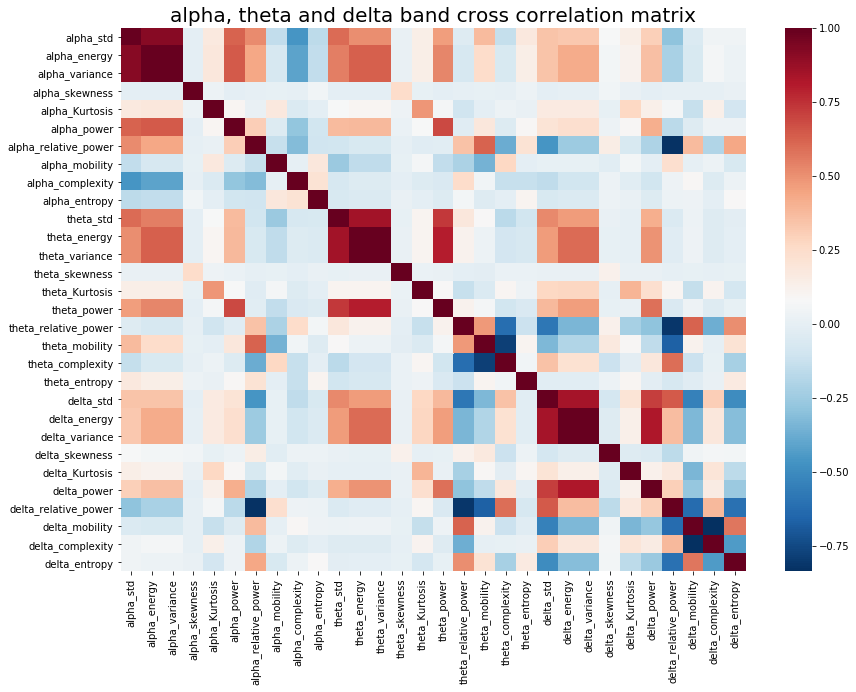

In [20]:
%matplotlib inline
plt.subplots(figsize=(14,10))
plt.title('alpha, theta and delta band cross correlation matrix', fontsize=20)
corr = df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
                  'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy',
                'theta_std', 'theta_energy', 'theta_variance', 'theta_skewness', 'theta_Kurtosis', 
                'theta_power', 'theta_relative_power', 'theta_mobility', 'theta_complexity', 'theta_entropy',
               'delta_std', 'delta_energy', 'delta_variance', 'delta_skewness', 'delta_Kurtosis',
               'delta_power', 'delta_relative_power', 'delta_mobility', 'delta_complexity', 'delta_entropy']].corr()
sns.heatmap(corr, cmap = "RdBu_r")

In [13]:
# normalization between -1 to 1
df_norm = pd.DataFrame()
for i in df_feat:
    df_norm[i] = df_feat[i]/np.max(np.abs(df_feat[i]))
    
df_norm.shape

(141020, 30)

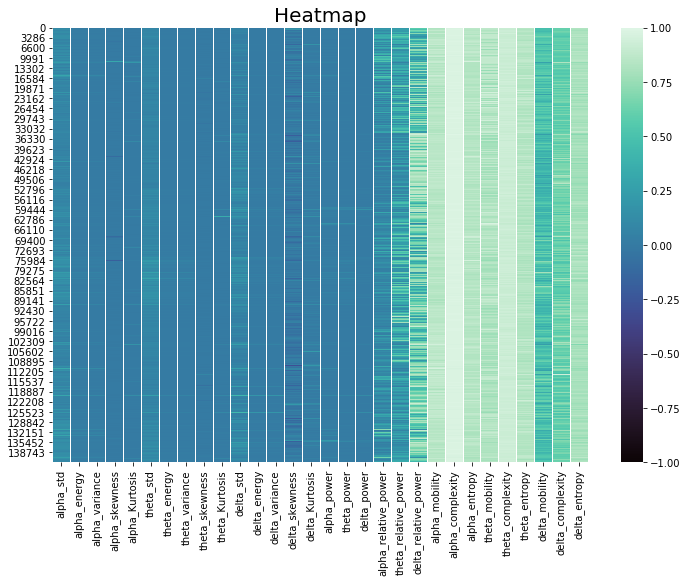

In [14]:
plt.subplots(figsize=(12,8))
plt.title('Heatmap', fontsize=20)
sns.heatmap(df_norm, cmap = "mako")